The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [Internet Archive Wayback Machine](https://web.archive.org/web/20180630204548/http://seaborn.pydata.org/).  

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Read dataset
df = pd.read_csv('files/Pokemon.csv', index_col=0)

In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.  

In [5]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


In [6]:
df.Stage.unique()

array([1, 2, 3], dtype=int64)

In [7]:
df.Legendary.sum()

4

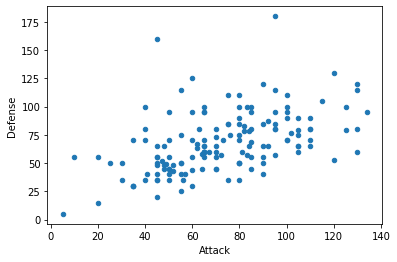

In [8]:
df.plot.scatter('Attack', 'Defense')

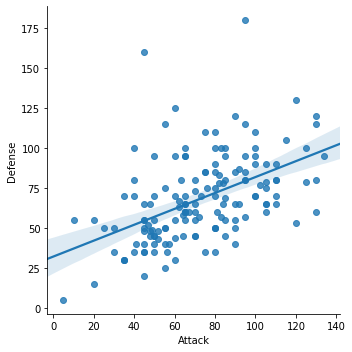

In [9]:
sns.lmplot(data=df, x='Attack', y='Defense')

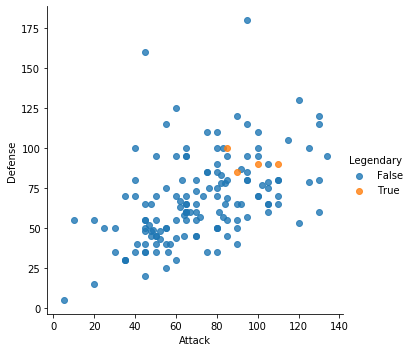

In [10]:
sns.lmplot(data=df, x='Attack', y='Defense', hue= 'Legendary', fit_reg=False)

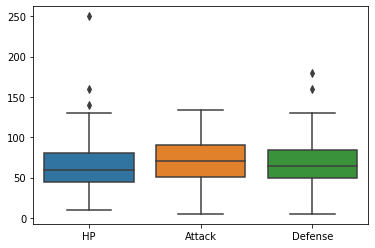

In [11]:
sns.boxplot(data=df[['HP','Attack','Defense'] ])

In [12]:
df.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Total,1.000000,0.576591,0.670939,0.508694,0.680745,0.774383,0.506950,0.504224,0.328412
HP,0.576591,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939,0.249207,0.172441
Attack,0.670939,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701,0.361321,0.147486
Defense,0.508694,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252,0.270861,0.141576
Sp. Atk,0.680745,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516,0.391712,0.334159
Sp. Def,0.774383,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656,0.358308,0.215314
Speed,0.506950,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000,0.240042,0.199969
Stage,0.504224,0.249207,0.361321,0.270861,0.391712,0.358308,0.240042,1.000000,-0.142508
Legendary,0.328412,0.172441,0.147486,0.141576,0.334159,0.215314,0.199969,-0.142508,1.000000


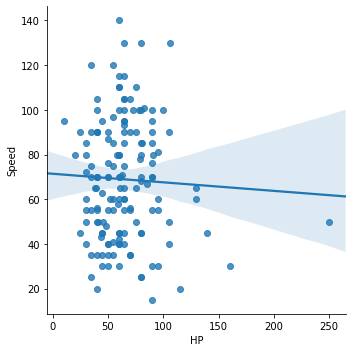

In [13]:
sns.lmplot(data=df, x='HP', y='Speed')

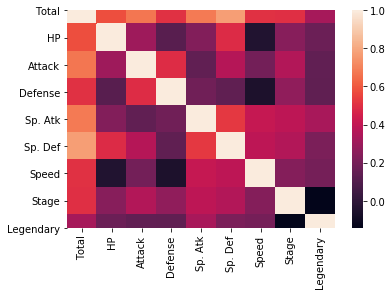

In [14]:
sns.heatmap(df.corr())

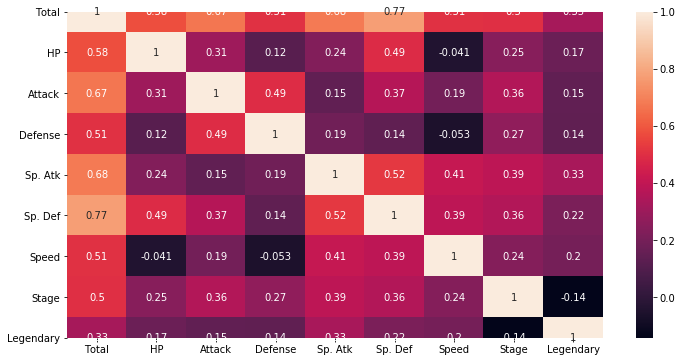

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

In [16]:
df['Attack*2']=df.Attack *2

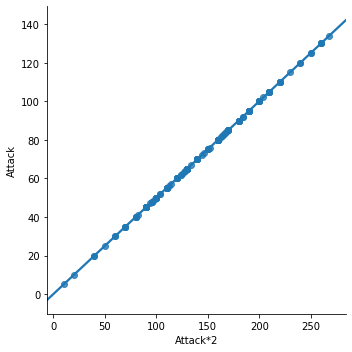

In [17]:
sns.lmplot(data=df, y='Attack', x='Attack*2')

In [18]:
df['Type 1'].value_counts()

Water       28
Normal      22
Poison      14
Grass       12
Fire        12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Ghost        3
Dragon       3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://web.archive.org/web/20180621043054/https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles) on that for the version in Anaconda.

In [ ]:
plt.figure(figsize=(12,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")